In [1]:
!wget https://raw.githubusercontent.com/ktan1008/ML-Task-1/main/data.csv

--2021-10-11 09:41:42--  https://raw.githubusercontent.com/ktan1008/ML-Task-1/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72499 (71K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  70.80K  --.-KB/s    in 0.02s   

2021-10-11 09:41:42 (4.44 MB/s) - ‘data.csv’ saved [72499/72499]



In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/content/data.csv")

In [4]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
data['survived'].value_counts()

0    537
1    313
Name: survived, dtype: int64

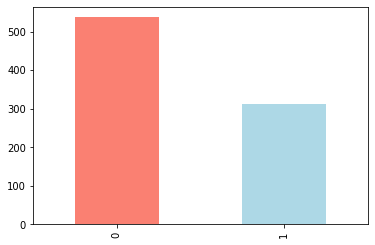

In [6]:
data['survived'].value_counts().plot(kind="bar",color=['salmon','lightblue']);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


### Checking the Nan Values

In [8]:
data.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [9]:
# Checking the shape of the data
data.shape

(850, 15)

>Note: As the number of rows are 850 and in some columns `Nan` values are greater than 500, which wouldn't make any sense using that column.

In [10]:
# Let's drop the columns containing nan values greater than 500
data=data.drop("cabin",axis=1)
data=data.drop("body",axis=1)
data=data.drop("boat",axis=1)
data=data.drop("home.dest",axis=1)

In [11]:
data.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          1
survived          0
dtype: int64

In [12]:
# Filling the remaining nan values with 'ffill' method
data['age'].fillna(18,inplace=True)
data['fare'].fillna(method='ffill',inplace=True)
data['embarked'].fillna(method='ffill',inplace=True)

In [13]:
data.isna().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   embarked      850 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ KB


## Label Encoding
> Applying label encoding to the columns whose data type is object

In [15]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
columns=['name','sex','ticket','embarked']
data[columns]=data[columns].apply(lr.fit_transform)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    int64  
 3   sex           850 non-null    int64  
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    int64  
 8   fare          850 non-null    float64
 9   embarked      850 non-null    int64  
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 73.2 KB


In [17]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,736,0,18.0,0,0,283,7.7333,1,1
1,699,3,123,1,38.0,0,0,257,8.6625,2,0
2,1267,3,783,0,30.0,1,1,307,24.1500,2,0
3,449,2,360,0,54.0,1,3,237,23.0000,2,1
4,576,2,792,1,40.0,0,0,228,13.0000,2,0


## Splitting the Data
> Splitting it into training and testing dataset

In [18]:
X=data.drop('survived',axis=1)
y=data['survived']

In [19]:
# Splitting the dtaset with the ration of 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

In [20]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_features='sqrt',max_leaf_nodes=100,min_weight_fraction_leaf=0.05,splitter='best')
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.05, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
model.score(X_test,y_test)

0.2845652230048952

In [22]:
data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived'],
      dtype='object')

In [23]:
model.predict([[100,101,2,1,3,4,5,6,7,8]])

array([0.32352941])

>Wohh seems to be our model has strarted its predictions 

### Next we should be using hyperparamter tunning to improve the model results